In [8]:
import os
import datetime as dt
import pandas as pd
#from arcgis.gis import GIS
import numpy as np
#import seaborn as sns
from sklearn.preprocessing import LabelEncoder

 

PRCRCityworks = pd.read_csv('~/code/000PRCRLast180_clean2.csv',sep=',') # check the csv file before to know that 'comma' here is ';'

print(PRCRCityworks.head(3))

print(list(PRCRCityworks.columns))# show the features and label

print(PRCRCityworks.shape) # instances vs features + label (4521, 17)

                                   Description     WoCost  WoLaborCost  \
0          Parks Greenway Construction Service  20409.560     5776.010   
1                    Parks Playgrounds Service   8344.930     1700.280   
2  Parks Athletic Fields - Field/Court Service   5176.175      274.175   

   WoMatCost  WoEquipCost  
0     5480.0      9153.55  
1     5250.0      1394.65  
2     4752.0       150.00  
['Description', 'WoCost', 'WoLaborCost', 'WoMatCost', 'WoEquipCost']
(168, 5)


In [11]:
#changing Description to ordinal
labelencoder = LabelEncoder()
PRCRCityworks['Description_Cat'] = labelencoder.fit_transform(PRCRCityworks['Description'])
PRCRCityworks

,Description,WoCost,WoLaborCost,WoMatCost,WoEquipCost,Description_Cat
0,Parks Greenway Construction Service,20409.560000,5776.010,5480.000000,9153.5500,7
1,Parks Playgrounds Service,8344.930000,1700.280,5250.000000,1394.6500,15
2,Parks Athletic Fields - Field/Court Service,5176.175000,274.175,4752.000000,150.0000,2
3,Parks Athletic Fields - Field/Court Service,5176.175000,274.175,4752.000000,150.0000,2
4,Parks Athletic Fields - Field/Court Service,5848.400000,1378.400,3960.000000,510.0000,2
...,...,...,...,...,...,...
163,Safety System Service,74.010000,33.210,20.000000,20.8000,19
164,Parks Winter Maintenance,130.217500,82.380,19.000000,28.8375,17
165,Parks Pesticide Application,243.995892,194.760,18.599892,30.6360,14
166,Parks Greenway Grounds Service,1105.790000,780.010,18.480000,307.3000,8


/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/peter/anaconda3/lib/python3.7/site-packages/seabo

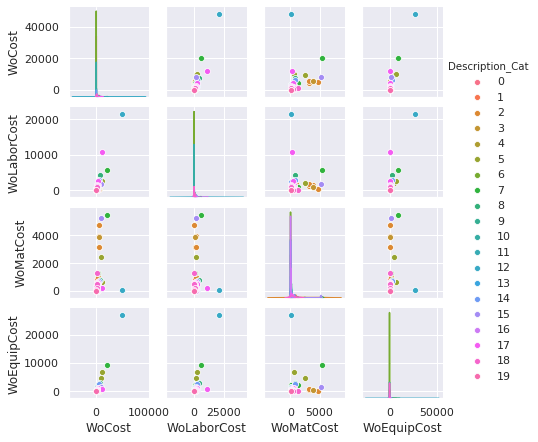

In [12]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(PRCRCityworks, hue='Description_Cat', height=1.5);



In [3]:
#clean bad data
# https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

PRCRCityworks['WoCost'].replace('', 0, inplace=True)
PRCRCityworks['WoLaborCost'].replace('', 0, inplace=True)
PRCRCityworks['WoMatCost'].replace('', 0, inplace=True)
PRCRCityworks['WoEquipCost'].replace('', 0, inplace=True)

PRCRCityworks.dropna()


,Description,WoCost,WoLaborCost,WoMatCost,WoEquipCost
0,Parks Greenway Construction Service,20409.560000,5776.010,5480.000000,9153.5500
1,Parks Playgrounds Service,8344.930000,1700.280,5250.000000,1394.6500
2,Parks Athletic Fields - Field/Court Service,5176.175000,274.175,4752.000000,150.0000
3,Parks Athletic Fields - Field/Court Service,5176.175000,274.175,4752.000000,150.0000
4,Parks Athletic Fields - Field/Court Service,5848.400000,1378.400,3960.000000,510.0000
...,...,...,...,...,...
163,Safety System Service,74.010000,33.210,20.000000,20.8000
164,Parks Winter Maintenance,130.217500,82.380,19.000000,28.8375
165,Parks Pesticide Application,243.995892,194.760,18.599892,30.6360
166,Parks Greenway Grounds Service,1105.790000,780.010,18.480000,307.3000


In [4]:
X_PRCR = PRCRCityworks.drop('Description', axis=1)
X_PRCR.shape



(168, 4)

In [5]:
# Unsupervised example
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_PRCR)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_PRCR)         # 4. Transform the data to t

IndexError: invalid index to scalar variable.

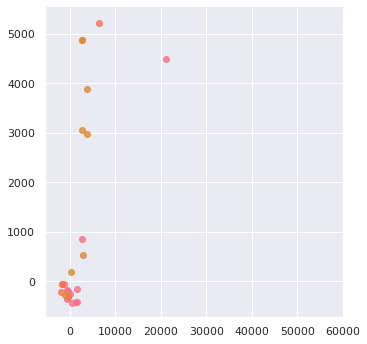

In [6]:
PRCRCityworks['PCA1'] = X_2D[:, 0]
PRCRCityworks['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Description', data=PRCRCityworks, fit_reg=False);